# Timing and testing code



# 1. Timing code:

We can use the **time** package.

See documentation here:

https://docs.python.org/3/library/time.html

In [1]:
# Import libraries
import mymodule.mymodule.mandel as md

import time

1741802749.068133
1741802749.173464
The execution time was = 0.1053309440612793 s.



/Users/wbandabarragan/Library/CloudStorage/Dropbox/GitHub_Repos/computational-physics-2/unit-2/mymodule/mymodule/mandel.py:24: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/Users/wbandabarragan/Library/CloudStorage/Dropbox/GitHub_Repos/computational-physics-2/unit-2/mymodule/mymodule/mandel.py:24: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


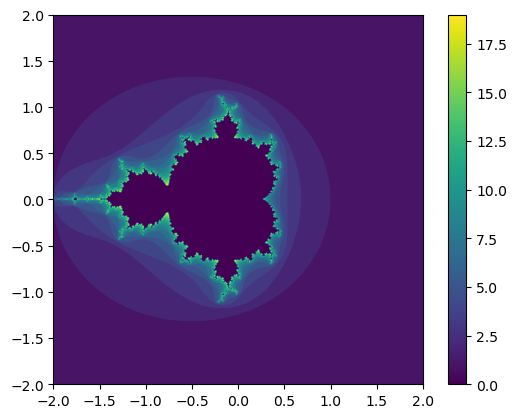

In [2]:
# Add a time stamp

start = time.time()

print(start)

# Define the initial parameters
N = 1024
max_iter = 20

# Call the md function
m = md.mandelbrot(N, max_iter = max_iter)


# Add another time stamp
end   = time.time()

print(end)

print(f"The execution time was = {end - start} s.\n")


1741802749.283204


/Users/wbandabarragan/Library/CloudStorage/Dropbox/GitHub_Repos/computational-physics-2/unit-2/mymodule/mymodule/mandel.py:26: RuntimeWarning: overflow encountered in absolute
  m[np.logical_and(np.abs(z) > 2, m == 0)] = i


1741802749.5732129
The execution time was = 0.2900087833404541 s.



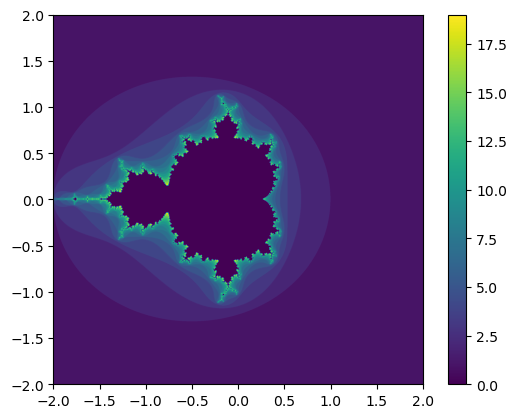

In [3]:
# Add a time stamp

start = time.time()

print(start)

# Define the initial parameters
N = 2048
max_iter = 20

# Call the md function
m = md.mandelbrot(N, max_iter = max_iter)


# Add another time stamp
end   = time.time()

print(end)

print(f"The execution time was = {end - start} s.\n")


In [4]:
# Import libraries

import stamodule.mdensity.densgen as dg
import stamodule.mdensity.velogen as vg

The grid has been generated.
PLot is ready.
Execution time is:  1.7241547107696533


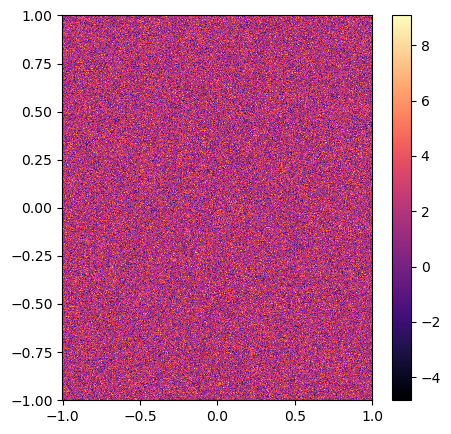

In [5]:
start_dg = time.time()

fig = dg.get_map(1000, "random")

end_dg = time.time()

exe_time = end_dg - start_dg

print("Execution time is: ", exe_time)

The grid has been generated.
PLot is ready.
Execution time is:  1.717289924621582


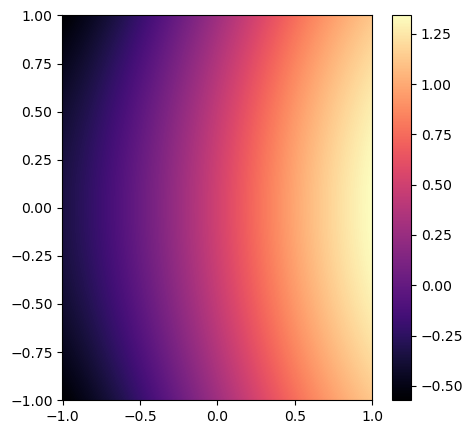

In [6]:
start_dg = time.time()

fig = dg.get_map(1000, "harmonic")

end_dg = time.time()

exe_time = end_dg - start_dg

print("Execution time is: ", exe_time)

The grid has been generated.
Plot is ready.
Execution time is:  0.012115955352783203


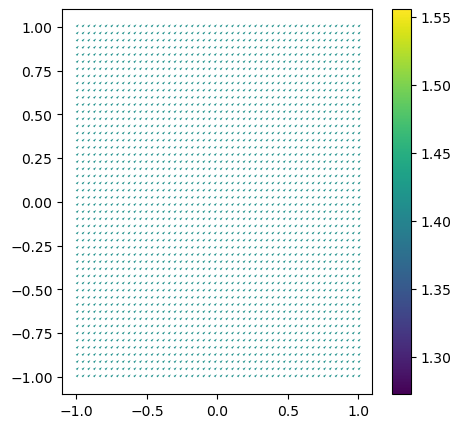

In [7]:
start_vg = time.time()

fig = vg.get_map(50, "uniform")

end_vg = time.time()

exe_time = end_vg - start_vg

print("Execution time is: ", exe_time)

# 2. Testing code:

- Testing is an integral part of the software development process.


- We want to catch mistakes early, before they go on to affect our results.

## Checking and improving code with pylint:

Pylint is a static code analysis tool for Python that examines code without executing it, checking for errors, coding standard violations, and potential style issues. It parses the source code, analyzes its structure and dependencies, and generates a report detailing potential problems, such as undefined variables, incorrect indentation, excessive complexity, and adherence to PEP 8 guidelines. By identifying these issues early in the development process, Pylint helps developers improve code quality, maintainability, and consistency, leading to more robust and reliable software.

``conda install anaconda::pylint``

### Usage:

``pylint mandel.py``

```bash
************* Module mymodule.mandel
mandel.py:7:0: R0913: Too many arguments (7/5) (too-many-arguments)
mandel.py:7:0: R0917: Too many positional arguments (7/5) (too-many-positional-arguments)
mandel.py:7:0: R0914: Too many local variables (18/15) (too-many-locals)

------------------------------------------------------------------
Your code has been rated at 8.42/10 (previous run: 8.42/10, +0.00)
```

### Code update:

We will add a class for the configuration:

```python 
"""functions for generating the Mandelbrot set."""

import matplotlib.pyplot as plt
import numpy as np

class MandelbrotConfig:
    """Configuration class for the Mandelbrot set."""
    def __init__(self, params):
        """Initializes the MandelbrotConfig with a dictionary of parameters."""
        self.nx = params.get('nx', 500)
        self.xmin = params.get('xmin', -2.0)
        self.xmax = params.get('xmax', 2.0)
        self.ymin = params.get('ymin', -2.0)
        self.ymax = params.get('ymax', 2.0)
        self.max_iter = params.get('max_iter', 10)
        self.take_log = params.get('take_log', False)

def mandelbrot(config):
    """create a mandelbrot set with a resolution
    nx x nx points. Returns a matplotlib Figure object"""

    x = np.linspace(config.xmin, config.xmax, config.nx)
    y = np.linspace(config.ymin, config.ymax, config.nx)

    xv, yv = np.meshgrid(x, y, indexing="ij")

    c = xv + 1j * yv

    z = np.zeros_like(c)

    m = np.zeros_like(c, dtype=np.int32)

    for i in range(config.max_iter):
        z = z**2 + c
        m[np.logical_and(np.abs(z) > 2, m == 0)] = i

    plot_fig, ax = plt.subplots()
    plot_fig.set_size_inches = (8, 8)

    if config.take_log:
        m = np.log10(m + 1)

    im = ax.imshow(m.T, origin="lower", extent=[config.xmin, config.xmax, config.ymin, config.ymax])

    plot_fig.colorbar(im, ax=ax)

    return plot_fig

# Example usage:
if __name__ == "__main__":
    params = {'nx': 500, 'max_iter': 50} # Parameters in a dictionary.
    mandel_config = MandelbrotConfig(params)
    fig = mandelbrot(mandel_config)
    plt.show()
```

### Rerun pylint:

```bash
************* Module mymodule.mandel
mandel3.py:8:23: W0621: Redefining name 'params' from outer scope (line 51) (redefined-outer-name)
mandel3.py:6:0: R0903: Too few public methods (0/2) (too-few-public-methods)

------------------------------------------------------------------
Your code has been rated at 9.39/10 (previous run: 9.39/10, +0.00)
```


### Types of testing

There are a lot of different types of software testing that exist.


Most commonly, for scientific codes, we hear about:

a) **Unit testing:** Tests that a single function does what it was designed to do.


b) **Integration testing:** Tests whether the individual pieces work together as intended. Sometimes done one piece at a time (iteratively)


c) **Regression testing:** Checks whether changes have changed answers.


d) **Verification & Validation (from the science perspective)**


  - **Verification:** are we solving the equations correctly?


  - **Validation:** are we solving the correct equations?


## Unit testing

1) When to write tests?


  - Some people advocate writing a unit test for a specification before you write the functions they will test. This is called Test-driven development (TDD): https://en.wikipedia.org/wiki/Test-driven_development


  - This helps you understand the interface, return values, side-effects, etc. of what you intend to write.


2) Often we already have code, so we can start by writing tests to cover some core functionality. Add new tests when you encounter a bug, precisely to ensure that this bug doesn’t arise again.

  - Tests should be short

  - We want to be able to run them frequently.

## Test cases:

### a) Setup test cases

Setup test cases are designed to run at the beginning of your test case in order to declare and define conditions and variables. The primary benefit of using a setup test case is to simplify the process of making global changes to test case parameters. 

### b) Teardown test case:

A teardown test case will execute at the end of your test run within a test folder. Teardown test cases are used to perform post test execution actions. For example, a teardown test case can be used to delete test data generated during test execution.


## Testing with pytest:

`pytest` is a unit testing framework for python code.

Basic elements:



* Discoverability: it will find the tests


* Automation


* Fixtures (setup and teardown)




## Installing

You can install `pytest` for a single user as:

```
conda install -c anaconda pytest
```

Or simply: 

```
conda install pytest
```

Alternatively, you can use pytest:

```
pip3 install pytest --user
```

This should put `pytest` in your search path, likely in `~/.local/bin`.

If you want to generate coverage reports, you should also install `pytest-cov`:

```
pip3 install pytest-cov --user
```

## Test naming conventions:

Adhering to these naming conventions will ensure that your tests are automatically found:


1) File names should start or end with “test”:


  * `test_example.py`


  * `example_test.py`


2) For tests in a class, the class name should begin with `Test`


  * e.g., `TestExample`
  
  
  * There should be no `__init__()`


3) Test method / function names should start with `test_`

  * e.g., `test_example()`


## Assertions

Tests use assertions (via python’s `assert` statement) to check behavior at runtime


* See documentation here: https://docs.python.org/3/reference/simple_stmts.html#assert 


* Basic usage: `assert expression`


  * Raises `AssertionError` if expression is not true


  * e.g., `assert 1 == 0` will fail with an exception

### Example 1:

Create a file named `test_simple.py` with the following content:

```python
def multiply(a, b):
    return a*b

def test_multiply():
    assert multiply(4, 6) == 24

def test_multiply2():
    assert multiply(5, 6) == 2
```

then we can run the tests as:

```
pytest -v test_simple.py
```



## Fixtures:

Unit tests require some setup to be done before the test is run.  Fixtures provide this capability.


**pytest** provides `setup` and `teardown` functions/methods for tests, see https://docs.pytest.org/en/6.2.x/fixture.html for more details.


### Notes: 

- By default, **pytest** will capture **stdout** and only show it on failures. Remember that **stdout**, also known as **standard output**, is the default file descriptor where a process can write output. For example, in the terminal, standard output defaults to the user's screen.



- If you want to always show stdout, add the `-s` flag.



# Test class:


It is common to use a class to organize a set of related unit tests.


We need a class method.


## What is a class method?

- A class method is a method that is bound to a class rather than its object.


- It doesn't require creation of a class instance, much like staticmethod.


- The difference between a static method and a class method is: 


    * Static method knows nothing about the class and just deals with the parameters.

    * Class method works with the class since its parameter is always the class itself.

    * The class method can be called both by the class and its object.
  
### Example 1:

In [14]:
class MyClass:
    class_variable = "Class Level"

    def instance_method(self):
        """Instance method: operates on instances."""
        print(f"Instance method called on: {self}")
        print(f"Accessing class variable: {MyClass.class_variable}")  # Can access class variables
        self.instance_variable = "Instance Level"  # Can create instance variables
        print(f"Accessing instance variable: {self.instance_variable}")

    @classmethod
    def class_method(cls):
        """Class method: operates on the class itself."""
        print(f"Class method called on: {cls}")
        print(f"Accessing class variable: {cls.class_variable}")  # Can access class variables
        # cls.instance_variable = "Instance Level"  # Cannot create instance variables (AttributeError)

In [15]:
# Usage:

# Create an instance
obj = MyClass()

# Call instance method
obj.instance_method()

# Call class method (on the class)
MyClass.class_method()

# Call class method (on the instance)
obj.class_method()

# Trying to call the instance method on the class directly.
try:
    MyClass.instance_method() #This will cause an error.
except TypeError as e:
    print(f"Error: {e}")

Instance method called on: <__main__.MyClass object at 0x39c74c7c0>
Accessing class variable: Class Level
Accessing instance variable: Instance Level
Class method called on: <class '__main__.MyClass'>
Accessing class variable: Class Level
Class method called on: <class '__main__.MyClass'>
Accessing class variable: Class Level
Error: instance_method() missing 1 required positional argument: 'self'


### Example 2:

We will look at an example with a NumPy array:


* We always want the array to exist for our tests, so we will use fixtures (in particular `setup_method()`) to create the array.


* Using a class means that we can access the array created in setup from our class.


* We'll use NumPy's own assertion functions: https://numpy.org/doc/stable/reference/routines.testing.html




In [10]:
import numpy as np

In [16]:
# Generate a vector
a = np.arange(24)

# Print the max
print(a)
print(a.max())
print(a.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
23
(24,)


In [17]:
# Reshape our array to make 2D
b = a.reshape(6, 4)

print(b)
print(b.max())
print(b.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
23
(6, 4)


In [18]:
# Flatten the array into 1D 
c = b.flatten()

print(c)
print(c.max())
print(c.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
23
(24,)


### Why use decorators?

- **Class-Level Scope:** ``setup_class`` and ``teardown_class`` are designed to operate at the class level. They're executed once for the entire test class, not for each individual test method.

- **No Instance Available:** When pytest calls ``setup_class`` and ``teardown_class``, it doesn't necessarily create an instance of your TestClassExample class. Therefore, there's no self (instance) to pass to the method.

- **Passing the Class:** The @classmethod decorator ensures that pytest passes the class itself as the first argument (cls) to these methods.

- **Class-Level Operations:** This allows ``setup_class`` and ``teardown_class`` to perform operations that affect the entire class, such as:
Setting up shared resources (e.g., database connections, file handles) that are used by all tests in the class.
Performing class-level initialization or cleanup.

- If you remove the @classmethod decorator, these methods would become regular instance methods. ``pytest`` would then expect an instance of the class to be passed as the first argument (self). -> TypeError as the method would be called without the expected instance.

- @classmethod is essential for setup_class and teardown_class because they operate on the class itself, not on instances.

-  pytest relies on @classmethod to pass the class as the first argument to these methods.
setup_method and teardown_method don't need @classmethod because they operate on instances of the test class.



### Sample code:
```python
# a test class is useful to hold data that we might want setup
# for every test.

import numpy as np
from numpy.testing import assert_array_equal

class TestClassExample(object):

    @classmethod
    def setup_class(cls):
        """ this is run once for each class, before any tests """
        pass

    @classmethod
    def teardown_class(cls):
        """ this is run once for each class, after all tests """
        pass

    def setup_method(self):
        """ this is run before each of the test methods """
        self.a = np.arange(24).reshape(6, 4)

    def teardown_method(self):
        """ this is run after each of the test methods """
        pass

    def test_max(self):
        assert self.a.max() == 23

    def test_flat(self):
        assert_array_equal(self.a.flat, np.arange(24))
```

Put this into a file called `test_class.py` and then we can run as:

```
pytest -v test_class.py 
```

